In [44]:
import h5py
import numpy as np
import arviz as az
import matplotlib.pyplot as plt


In [45]:
sample_paths = [
    '/home/anne/Masterarbeit/masterarbeit/results/samples4_l0.h5',
    '/home/anne/Masterarbeit/masterarbeit/results/samples4_l1.h5',
    '/home/anne/Masterarbeit/masterarbeit/results/samples4_l2.h5',
    '/home/anne/Masterarbeit/masterarbeit/results/samples4_mlda.h5'
]

samples = []

for i in range(len(sample_paths)):
    fin = h5py.File(sample_paths[i])
    samples.append(np.array( fin['/samples'] ))
    fin.close()

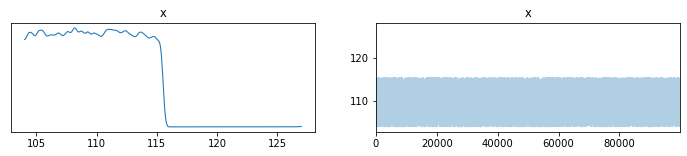

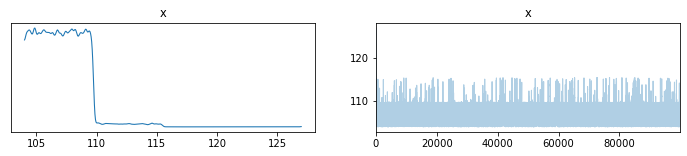

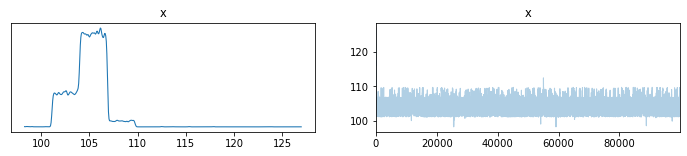

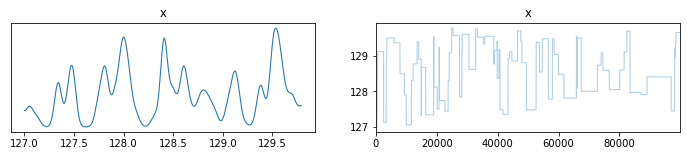

In [46]:
for i in range(len(sample_paths)):
    s = samples[i]
    az.plot_trace(s[0,:])

array([[<AxesSubplot:title={'center':'x'}>]], dtype=object)

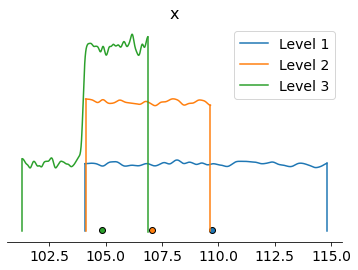

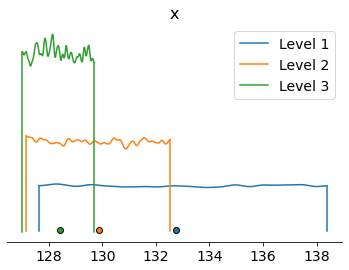

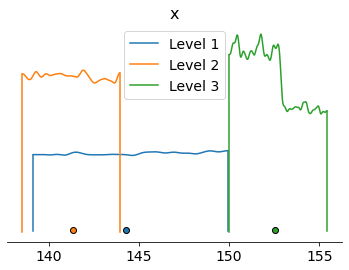

In [47]:
s0 = []
s1 = []
s2 = []

data_labels = ["Level 1", "Level 2", "Level 3"]

for i in range(len(sample_paths)-1):
    s0.append(samples[i][0,:])
    s1.append(samples[i][1,:])
    s2.append(samples[i][2,:])

az.plot_density(s0, data_labels=data_labels)
az.plot_density(s1, data_labels=data_labels)
az.plot_density(s2, data_labels=data_labels)

In [48]:
num = 99000
point = np.array([130,140,120])

print("Means")

for i in range(len(sample_paths)):
    print(np.mean(samples[i][:,0:num], axis=1))

print("\nVariance")
for i in range(len(sample_paths)):
    print(np.var(samples[i][:,0:num], axis=1))


h = np.repeat([point], num, axis=0).transpose()
print("\nAverage L2-Error")
for i in range(len(sample_paths)):
    #print(samples[i])
    #print(np.linalg.norm(samples[i][:,0:num]-h)/num)


SyntaxError: incomplete input (2532085127.py, line 18)

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.6000e+01, 1.7000e+01, 1.7000e+01, 1.9000e+01,
        6.0000e+00, 4.0000e+00, 5.0000e+00, 1.6000e+01, 8.7400e+02,
        5.9025e+04, 3.9818e+04, 1.8300e+02, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]),
 array([ 35.   ,  37.875,  40.75 ,  43.625,  46.5  ,  49.375,  52.25 ,
         55.125,  58.   ,  60.875,  63.75 ,  66.625,  6

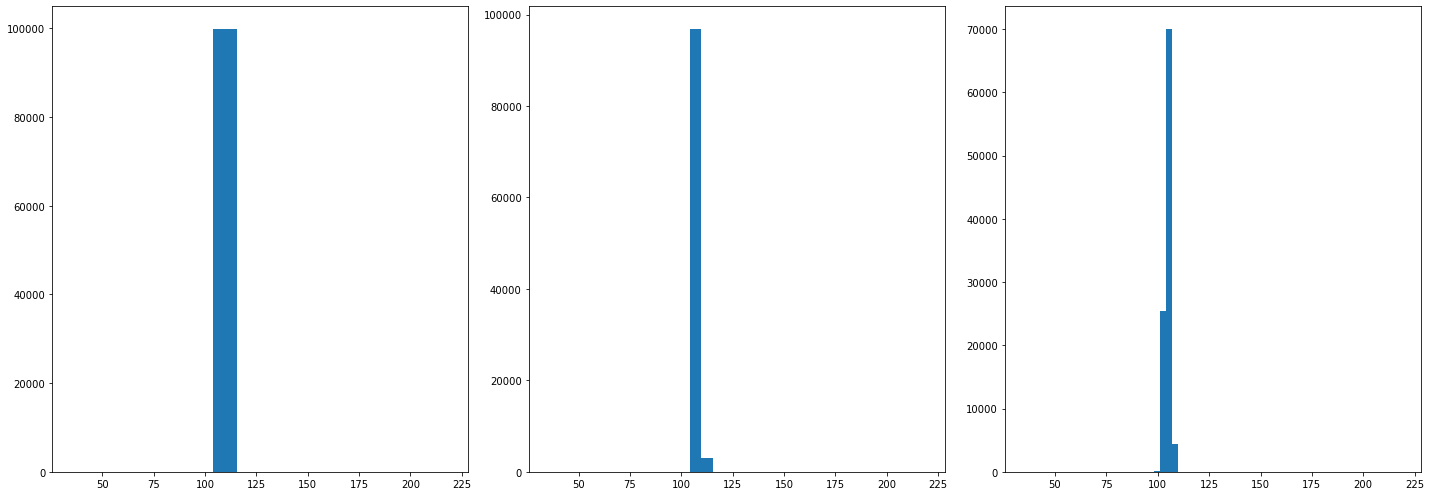

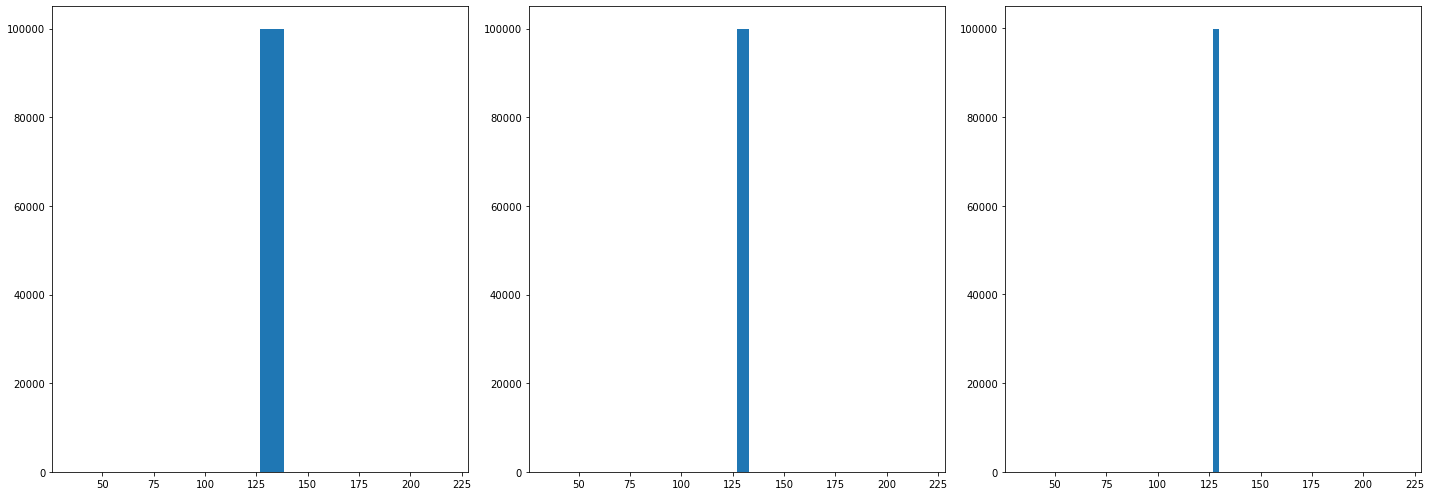

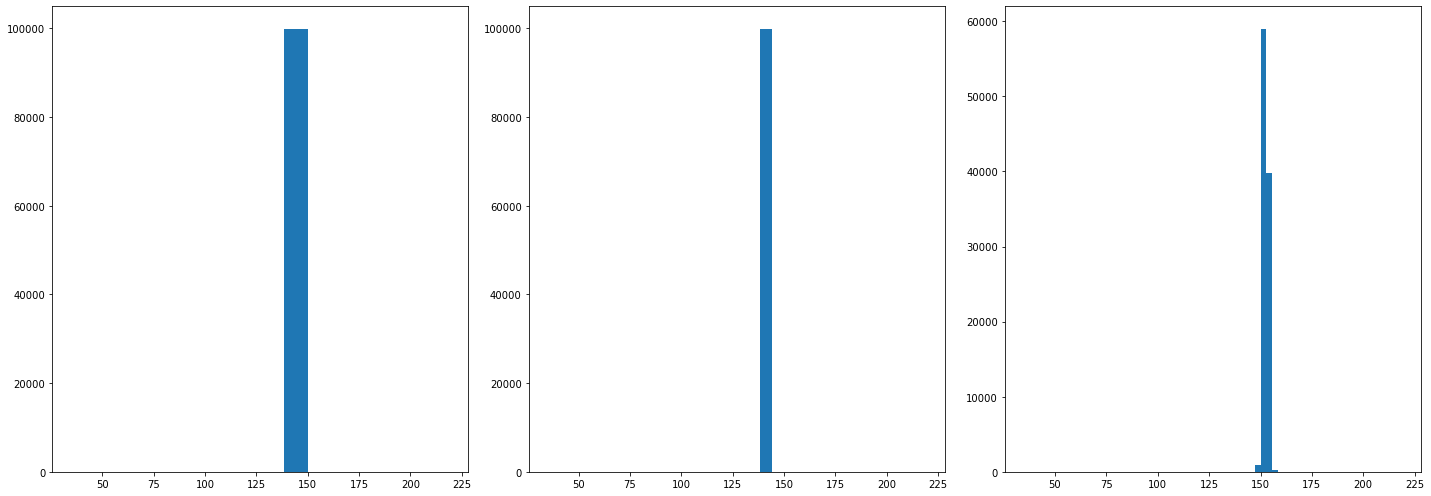

In [ ]:
fig, axs = plt.subplots(1, 3,
                        figsize =(20, 7),
                        tight_layout = True)
 
axs[0].hist(samples[0][0,:], bins = 16, range = [35,219])
axs[1].hist(samples[1][0,:], bins = 32, range = [35,219])
axs[2].hist(samples[2][0,:], bins = 64, range = [35,219])

fig, axs = plt.subplots(1, 3,
                        figsize =(20, 7),
                        tight_layout = True)
 
axs[0].hist(samples[0][1,:], bins = 16, range = [35,219])
axs[1].hist(samples[1][1,:], bins = 32, range = [35,219])
axs[2].hist(samples[2][1,:], bins = 64, range = [35,219])

fig, axs = plt.subplots(1, 3,
                        figsize =(20, 7),
                        tight_layout = True)
 
axs[0].hist(samples[0][2,:], bins = 16, range = [35,219])
axs[1].hist(samples[1][2,:], bins = 32, range = [35,219])
axs[2].hist(samples[2][2,:], bins = 64, range = [35,219])

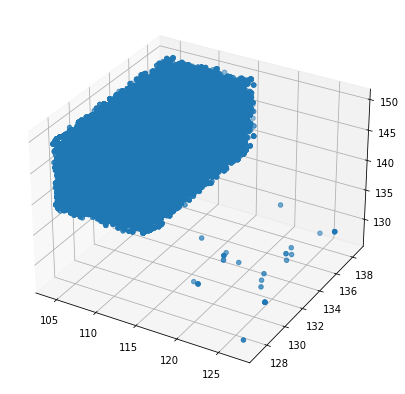

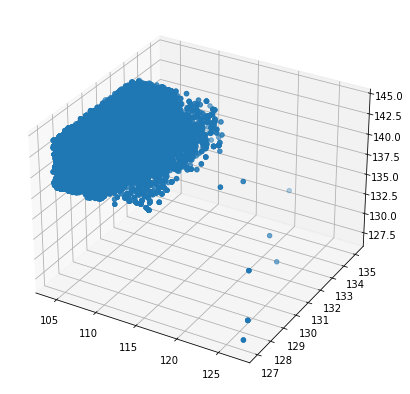

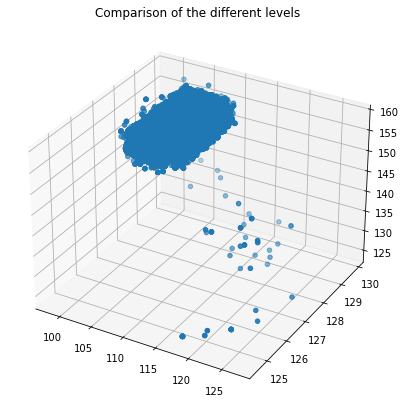

In [ ]:
for i in range(len(sample_paths)-1):
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes(projection ="3d")
    ax.scatter3D(samples[i][0,:], samples[i][1,:], samples[i][2,:])

plt.title("Comparison of the different levels")

plt.show()

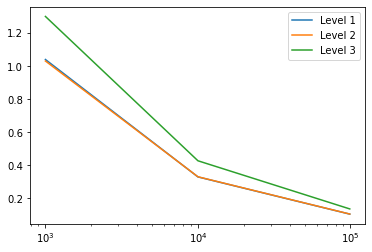

In [ ]:
nums = [1000, 10000, 99000]

for i in range(len(sample_paths)-1):
    errors = []
    for num in nums:
        h = np.repeat([point], num, axis=0).transpose()
        errors.append(np.linalg.norm(samples[i][:,0:num]-h)/num)
    
    plt.plot(nums, errors, label='Level '+str(i+1))

plt.xscale("log")
plt.legend()
plt.show()